In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,mean_squared_error,r2_score

In [3]:
data = pd.read_csv("DC_Properties_trimmed.csv")

In [4]:
data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BATHRM              28900 non-null  int64  
 1   HF_BATHRM           28900 non-null  int64  
 2   HEAT                28900 non-null  object 
 3   AC                  28900 non-null  object 
 4   NUM_UNITS           28900 non-null  int64  
 5   ROOMS               28900 non-null  int64  
 6   BEDRM               28900 non-null  int64  
 7   AYB                 28900 non-null  int64  
 8   YR_RMDL             28900 non-null  int64  
 9   EYB                 28900 non-null  int64  
 10  STORIES             28900 non-null  float64
 11  SALEDATE            28900 non-null  object 
 12  PRICE               28900 non-null  int64  
 13  QUALIFIED           28900 non-null  object 
 14  SALE_NUM            28900 non-null  int64  
 15  GBA                 28900 non-null  int64  
 16  BLDG

In [6]:
data.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,...,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,...,0.715848,13.724637,2852.047197,20009.906851,38.913195,-77.010707,5509.161730,2663.814844,-77.010712,38.913201
std,1.038695,0.588201,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,...,0.982890,4.704569,2865.397209,7.541925,0.030292,0.041245,3297.000377,1704.447584,0.041238,0.030293
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,...,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000,-77.113135,38.820576
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,...,0.000000,11.000000,1419.000000,20002.000000,38.892645,-77.033455,2301.000000,1052.000000,-77.033397,38.892800
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,...,0.000000,12.000000,1943.000000,20010.000000,38.911306,-77.005555,6700.000000,2621.000000,-77.005088,38.911421
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,...,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000,-76.986004,38.933636
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,...,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,-76.910511,38.982276


In [7]:
### Lets check the percentage of null in columns:

In [8]:
data.isnull().sum()/len(data)*100

BATHRM                0.0
HF_BATHRM             0.0
HEAT                  0.0
AC                    0.0
NUM_UNITS             0.0
ROOMS                 0.0
BEDRM                 0.0
AYB                   0.0
YR_RMDL               0.0
EYB                   0.0
STORIES               0.0
SALEDATE              0.0
PRICE                 0.0
QUALIFIED             0.0
SALE_NUM              0.0
GBA                   0.0
BLDG_NUM              0.0
STYLE                 0.0
STRUCT                0.0
GRADE                 0.0
CNDTN                 0.0
EXTWALL               0.0
ROOF                  0.0
INTWALL               0.0
KITCHENS              0.0
FIREPLACES            0.0
USECODE               0.0
LANDAREA              0.0
GIS_LAST_MOD_DTTM     0.0
SOURCE                0.0
FULLADDRESS           0.0
CITY                  0.0
STATE                 0.0
ZIPCODE               0.0
NATIONALGRID          0.0
LATITUDE              0.0
LONGITUDE             0.0
ASSESSMENT_NBHD       0.0
ASSESSMENT_S

In [9]:
data.shape

(28900, 46)

In [10]:
corr = data.corr()

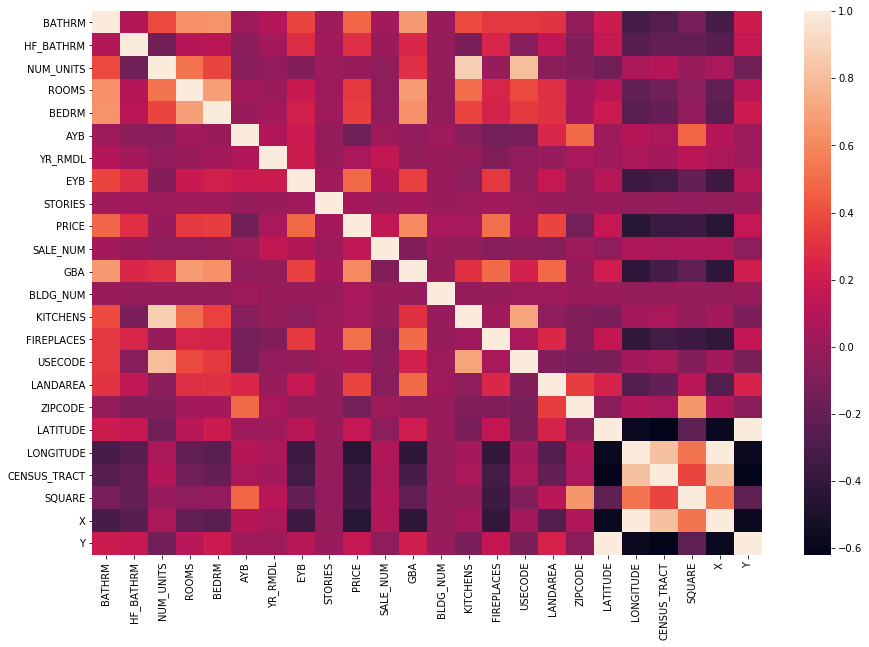

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [12]:
data["QUALIFIED"].unique()  ## This can be our target column whether the house is qualified for sale or not:

array(['Q', 'U'], dtype=object)

In [13]:
## Let's see that our data is clean or not:

# Detecting outliers for different columns:

In [14]:
data.iloc[:,:10]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967
...,...,...,...,...,...,...,...,...,...,...
28895,3,0,Forced Air,N,3,13,8,1953,2016,1971
28896,3,0,Forced Air,N,3,14,6,1953,1999,1971
28897,2,0,Forced Air,Y,2,10,4,1953,2017,1971
28898,2,0,Forced Air,N,2,10,4,1953,2017,1971


In [15]:
### Dropping the data columns which have relevant data:

In [16]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [17]:
data.drop(["SOURCE","FULLADDRESS","CITY","STATE","LATITUDE","LONGITUDE"], axis=1, inplace=True)

In [18]:
data.drop(["STYLE"],axis=1, inplace=True)

In [19]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'ZIPCODE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'X', 'Y', 'QUADRANT'],
      dtype='object')

In [20]:
data.shape

(28900, 39)

In [21]:
data.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,18S UJ 23061 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,18S UJ 23074 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [22]:
## checking the outliers:

In [23]:
data["BATHRM"].unique()

array([ 4,  3,  1,  2,  5,  7,  6,  9,  0, 10, 11,  8], dtype=int64)

In [24]:
data["HF_BATHRM"].unique()

array([ 0,  1,  2,  3,  4,  5, 11], dtype=int64)

In [25]:
data["HEAT"].unique()

array(['Warm Cool', 'Hot Water Rad', 'Forced Air', 'Elec Base Brd',
       'Ht Pump', 'Wall Furnace', 'Electric Rad', 'Water Base Brd',
       'No Data', 'Ind Unit', 'Evp Cool', 'Air Exchng', 'Air-Oil',
       'Gravity Furnac'], dtype=object)

In [26]:
data["KITCHENS"].unique()

array([ 2,  1,  4,  3,  0,  6, 44,  5], dtype=int64)

In [27]:
data["STORIES"].unique()

array([  3.  ,   2.  ,   4.  ,   2.5 ,   3.5 ,   1.  ,   3.25,   1.5 ,
         2.25,   2.7 , 826.  ,   2.75,   6.  ,   2.3 ,   2.2 ,   3.7 ,
         1.75,   1.7 , 250.  , 275.  ,   1.25,   5.  ,   3.75,   0.  ,
         9.  ,  20.  ])

In [28]:
import numpy as np

In [29]:
data["KITCHENS"].describe()

count    28900.000000
mean         1.302491
std          0.697155
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         44.000000
Name: KITCHENS, dtype: float64

# Univariate Analysis:

In [30]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'ZIPCODE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'X', 'Y', 'QUADRANT'],
      dtype='object')

Text(0.5, 0, 'No of Bathrooms')

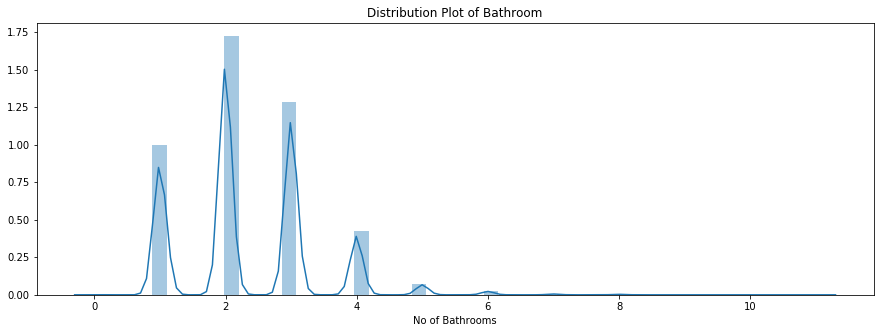

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(data["BATHRM"])
plt.title("Distribution Plot of Bathroom")
plt.xlabel("No of Bathrooms")

Text(0, 0.5, 'No. of property sold')

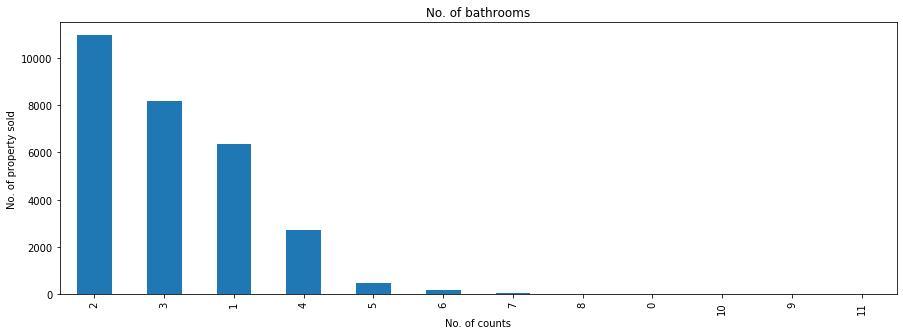

In [32]:
plt.figure(figsize=(15,5))
data["BATHRM"].value_counts().plot(kind="bar")
plt.title("No. of bathrooms")
plt.xlabel("No. of counts")
plt.ylabel("No. of property sold")

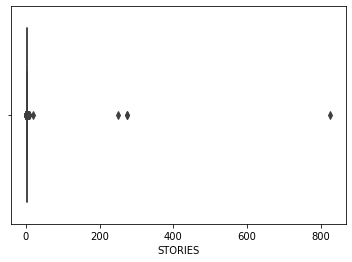

In [33]:
sns.boxplot(data["STORIES"])

In [34]:

def outlier_detect(data):
    ls = []
    u, l  = np.percentile(data,[75,25])
    iqr = u-l
    ul =  u+1.5*iqr
    ll = l-1.5*iqr
    for i in data:
        if(ll > i > ul):
            ls.append(i)
    return ls
        

        
        

In [35]:
a,b,c = np.percentile(data["BATHRM"],[10,25,75])

In [36]:
outlier = outlier_detect(data["BATHRM"])

## Bivariate Analysis:

In [37]:
data_Heat = pd.DataFrame(data.groupby("HEAT")["QUALIFIED"].value_counts())

In [38]:
data_Heat = data_Heat.rename(columns = {"QUALIFIED":"Count"}).reset_index()

In [39]:
data_Heat.head()

,HEAT,QUALIFIED,Count
0,Air Exchng,U,4
1,Air Exchng,Q,3
2,Air-Oil,Q,11
3,Air-Oil,U,5
4,Elec Base Brd,Q,24


Text(0.5, 1.0, 'No. of Houses Qualified/Unqualified for sale Based on Heat Category')

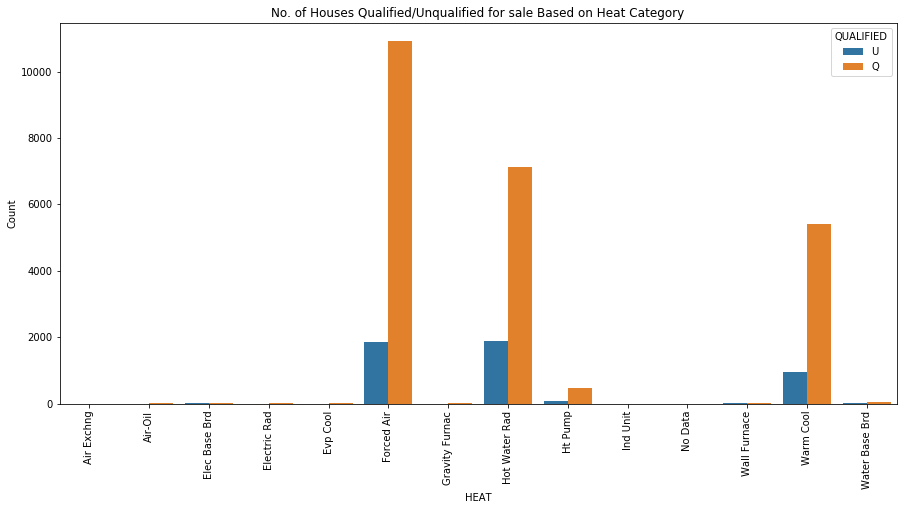

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x=data_Heat["HEAT"], y=data_Heat["Count"], hue=data_Heat["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified/Unqualified for sale Based on Heat Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Bathroom Category')

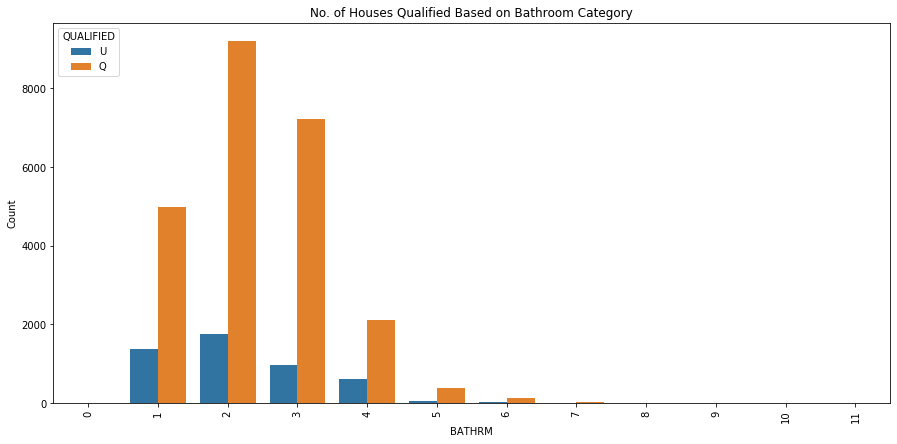

In [41]:
data_bath = pd.DataFrame(data.groupby("BATHRM")["QUALIFIED"].value_counts())
data_bath = data_bath.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_bath["BATHRM"], y=data_bath["Count"], hue=data_bath["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Bathroom Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on AC Category')

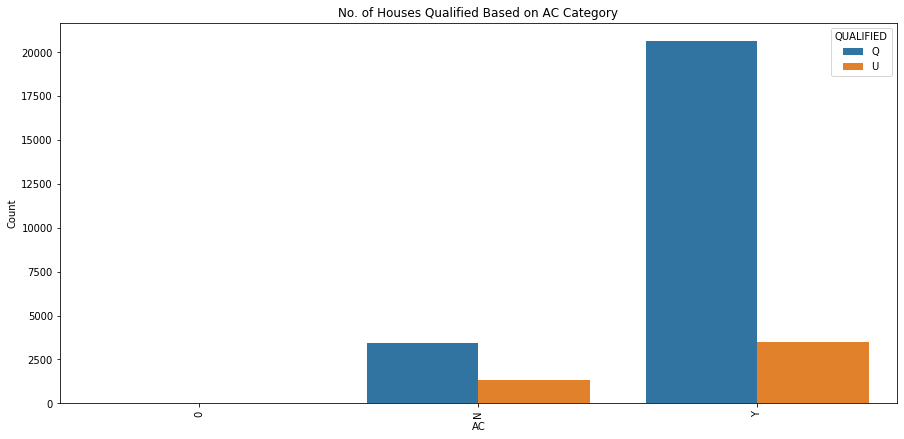

In [42]:
data_ac = pd.DataFrame(data.groupby("AC")["QUALIFIED"].value_counts())
data_ac = data_ac.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_ac["AC"], y=data_ac["Count"], hue=data_ac["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on AC Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on ROOMS Category')

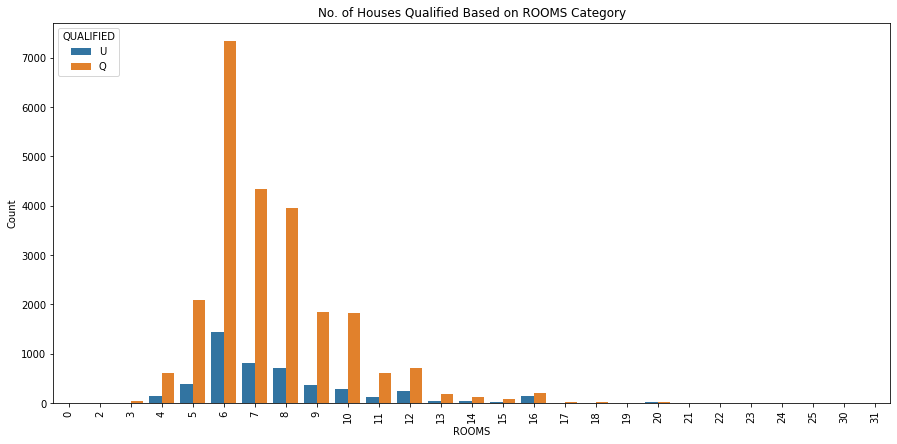

In [43]:
data_room = pd.DataFrame(data.groupby("ROOMS")["QUALIFIED"].value_counts())
data_room = data_room.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_room["ROOMS"], y=data_room["Count"], hue=data_room["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on ROOMS Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Bedroom Category')

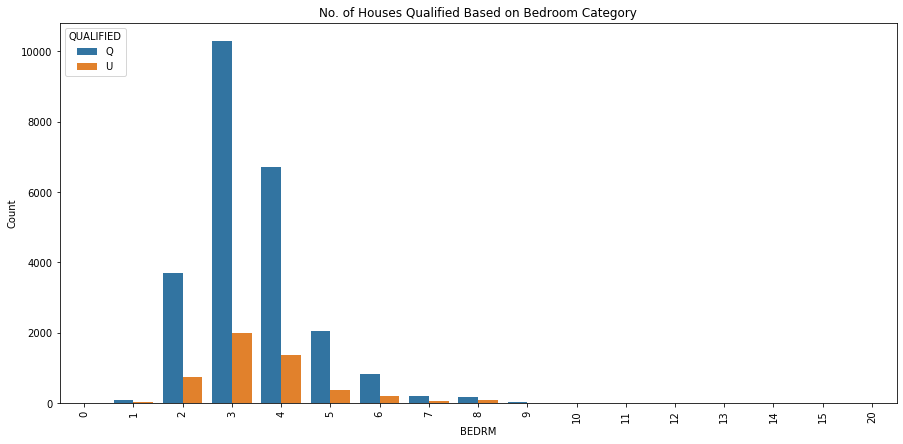

In [44]:
data_bedrm = pd.DataFrame(data.groupby("BEDRM")["QUALIFIED"].value_counts())
data_bedrm = data_bedrm.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_bedrm["BEDRM"], y=data_bedrm["Count"], hue=data_bedrm["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Bedroom Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Stories Category')

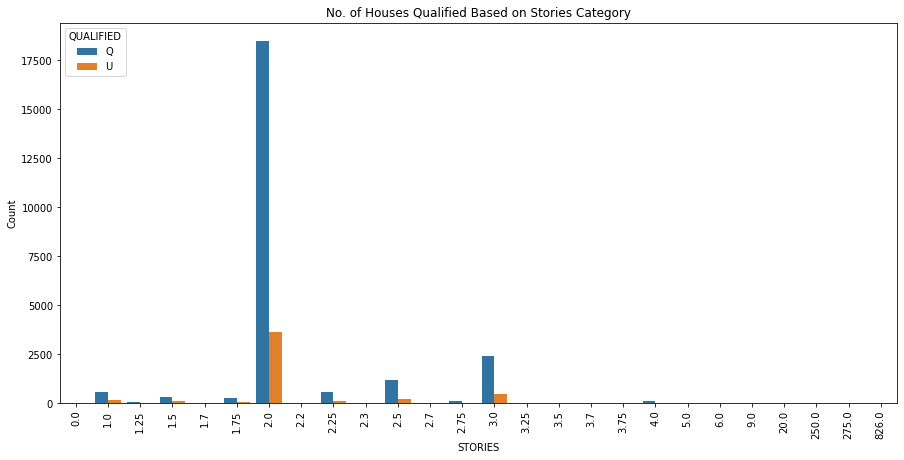

In [45]:
data_stories = pd.DataFrame(data.groupby("STORIES")["QUALIFIED"].value_counts())
data_stories = data_stories.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_stories["STORIES"], y=data_stories["Count"], hue=data_stories["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Stories Category")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Building Number')

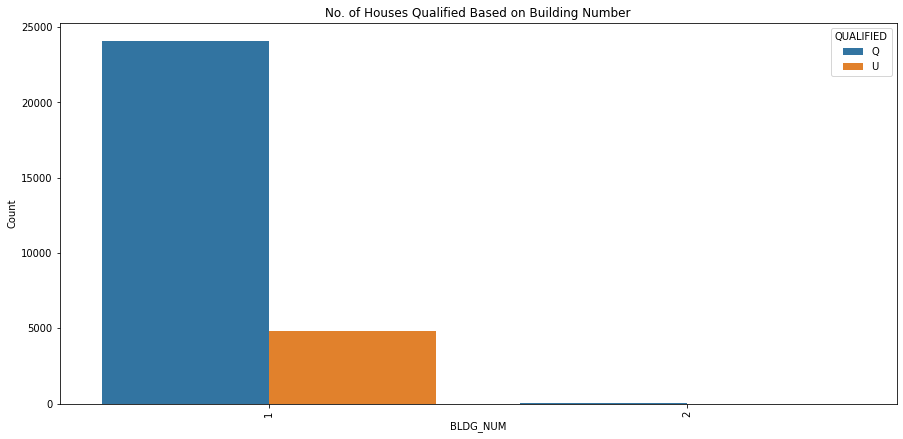

In [46]:
data_bldnm = pd.DataFrame(data.groupby("BLDG_NUM")["QUALIFIED"].value_counts())
data_bldnm = data_bldnm.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_bldnm["BLDG_NUM"], y=data_bldnm["Count"], hue=data_bldnm["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Building Number")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Structure')

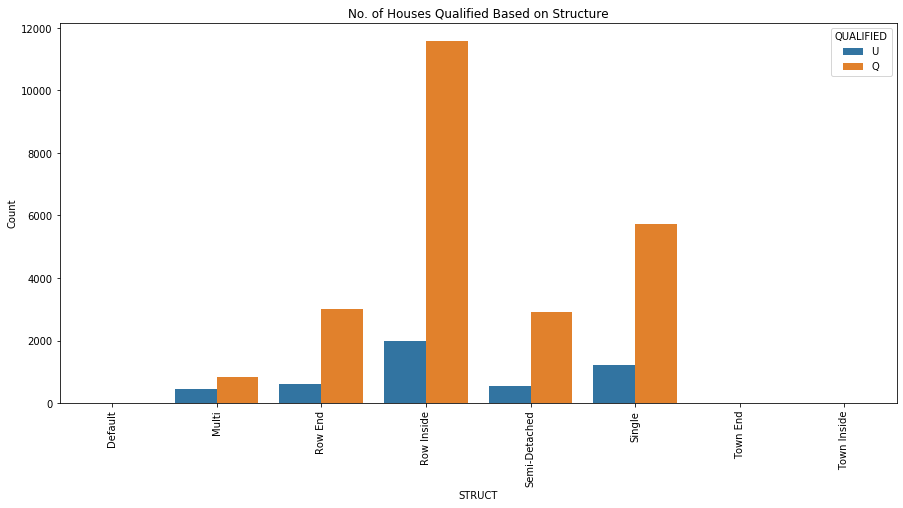

In [47]:
data_struct = pd.DataFrame(data.groupby("STRUCT")["QUALIFIED"].value_counts())
data_struct = data_struct.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_struct["STRUCT"], y=data_struct["Count"], hue=data_struct["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Structure")

Text(0.5, 1.0, 'No. of Houses Qualified Based on GRADE OF HOUSE')

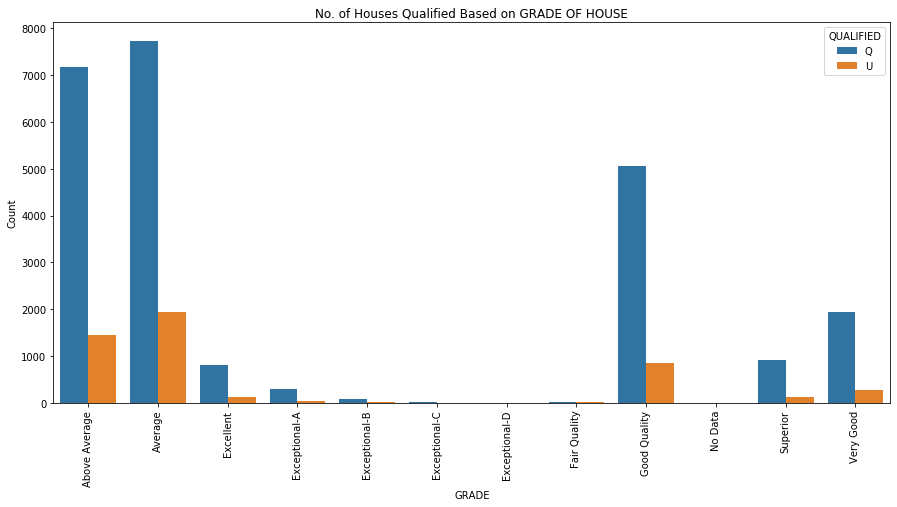

In [48]:
data_grade = pd.DataFrame(data.groupby("GRADE")["QUALIFIED"].value_counts())
data_grade = data_grade.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_grade["GRADE"], y=data_grade["Count"], hue=data_grade["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on GRADE OF HOUSE")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Condition Of House')

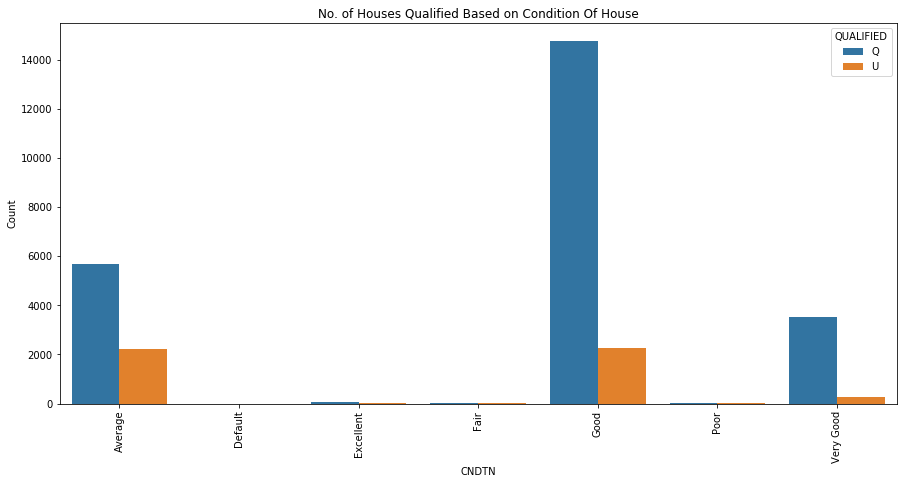

In [49]:
data_condition = pd.DataFrame(data.groupby("CNDTN")["QUALIFIED"].value_counts())
data_condition = data_condition.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_condition["CNDTN"], y=data_condition["Count"], hue=data_condition["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Condition Of House")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Roof Type')

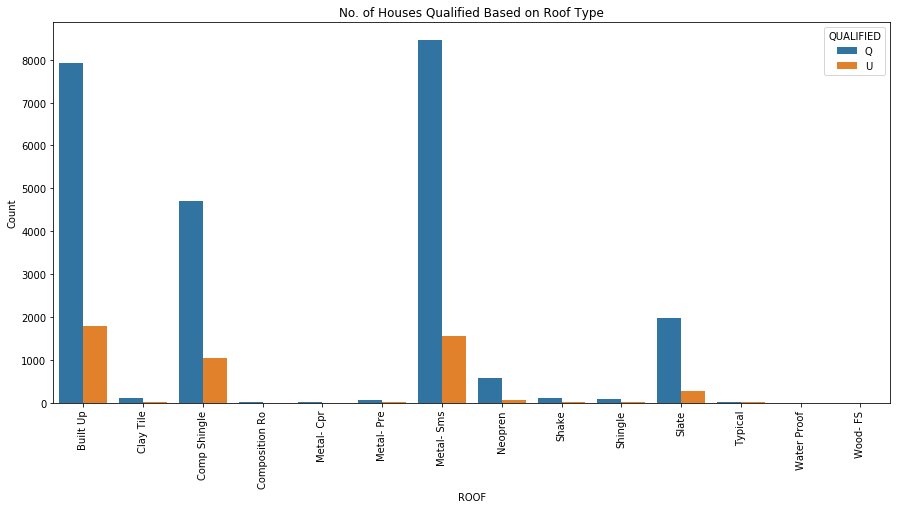

In [50]:
data_ROOF = pd.DataFrame(data.groupby("ROOF")["QUALIFIED"].value_counts())
data_ROOF = data_ROOF.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_ROOF["ROOF"], y=data_ROOF["Count"], hue=data_ROOF["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Roof Type")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Number of Kitchens')

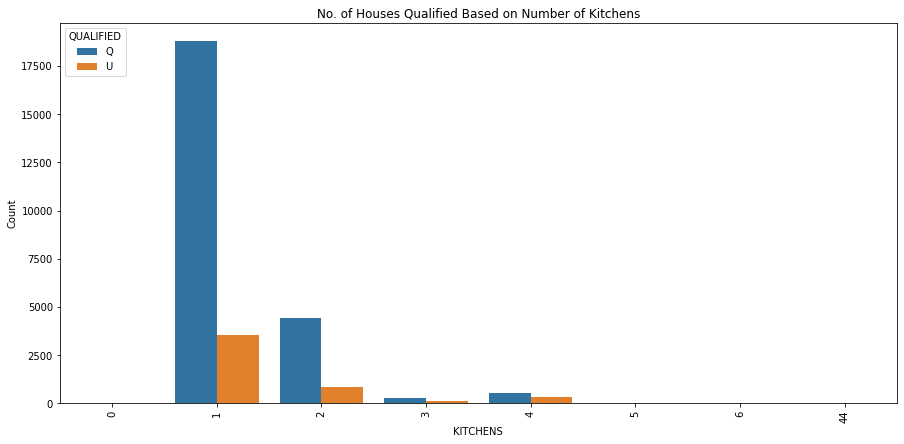

In [51]:
data_KITCHENS = pd.DataFrame(data.groupby("KITCHENS")["QUALIFIED"].value_counts())
data_KITCHENS = data_KITCHENS.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_KITCHENS["KITCHENS"], y=data_KITCHENS["Count"], hue=data_KITCHENS["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Number of Kitchens")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Zipcodes')

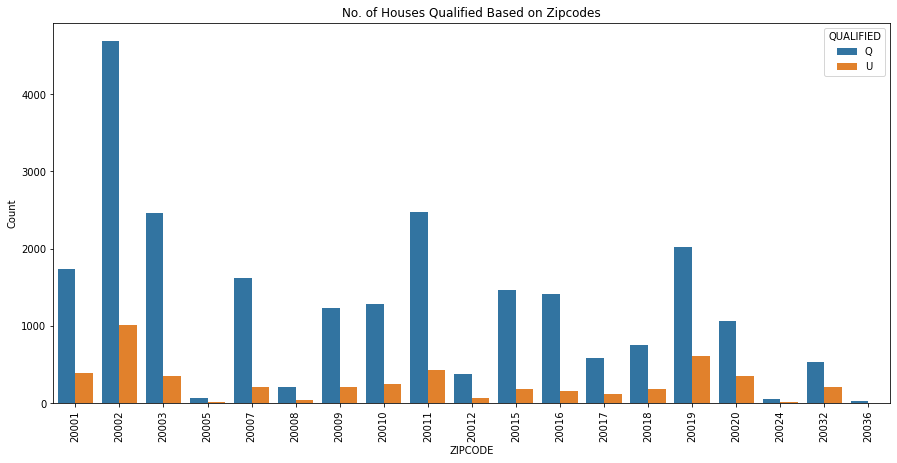

In [52]:
data_ZIPCODE = pd.DataFrame(data.groupby("ZIPCODE")["QUALIFIED"].value_counts())
data_ZIPCODE = data_ZIPCODE.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_ZIPCODE["ZIPCODE"], y=data_ZIPCODE["Count"], hue=data_ZIPCODE["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Zipcodes")

Text(0.5, 1.0, 'No. of Houses Qualified Based on Ward')

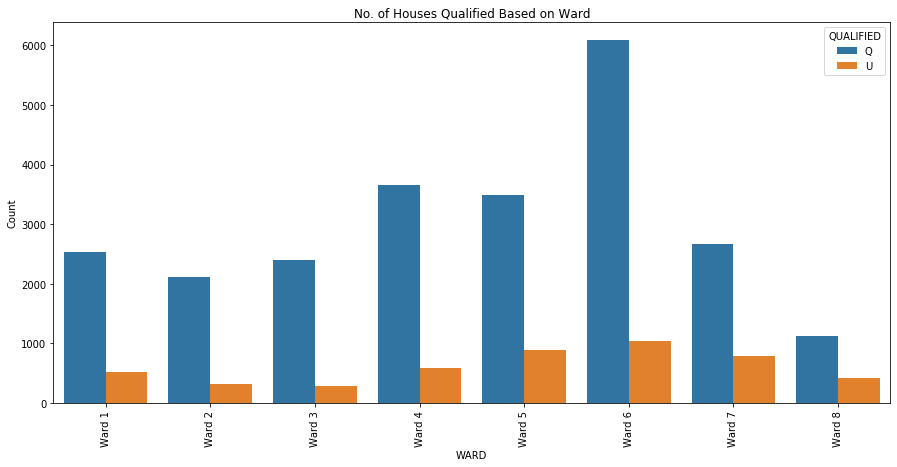

In [53]:
data_WARD = pd.DataFrame(data.groupby("WARD")["QUALIFIED"].value_counts())
data_WARD = data_WARD.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_WARD["WARD"], y=data_WARD["Count"], hue=data_WARD["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on Ward")

Text(0.5, 1.0, 'No. of Houses Qualified Based on QUADRANT')

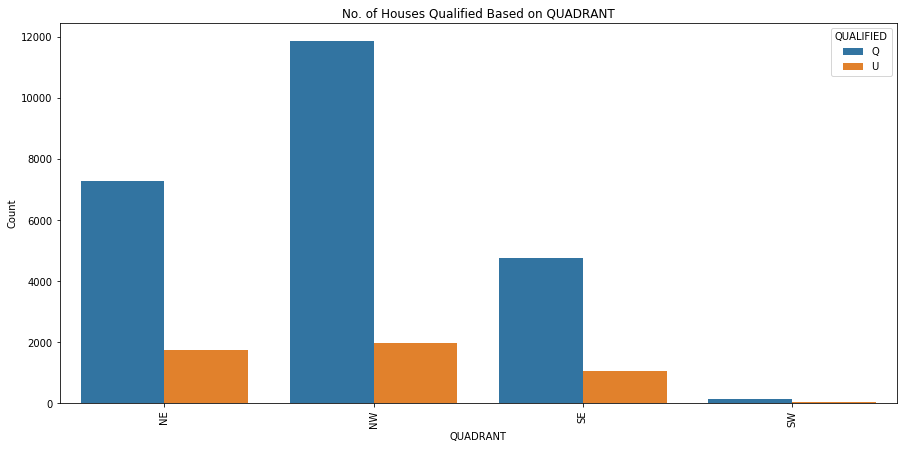

In [54]:
data_QUADRANT = pd.DataFrame(data.groupby("QUADRANT")["QUALIFIED"].value_counts())
data_QUADRANT = data_QUADRANT.rename(columns = {"QUALIFIED":"Count"}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=data_QUADRANT["QUADRANT"], y=data_QUADRANT["Count"], hue=data_QUADRANT["QUALIFIED"])
plt.xticks(rotation=90)
plt.title("No. of Houses Qualified Based on QUADRANT")

In [55]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'ZIPCODE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'X', 'Y', 'QUADRANT'],
      dtype='object')

In [56]:
data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,18S UJ 23061 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,18S UJ 23074 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,18S UJ 23078 09288,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,18S UJ 23124 09368,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,18S UJ 23142 09324,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [57]:
qualified = data[data["QUALIFIED"] == "Q"]

In [58]:
Uqualified = data[data["QUALIFIED"] == "U"]

In [59]:
qualified["DATE"] = pd.to_datetime(qualified["SALEDATE"]).dt.date

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
Uqualified["DATE"] = pd.to_datetime(Uqualified["SALEDATE"]).dt.date

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([735842., 735964., 736085., 736208., 736330., 736450., 736573.,
        736695., 736815.]),
 <a list of 9 Text xticklabel objects>)

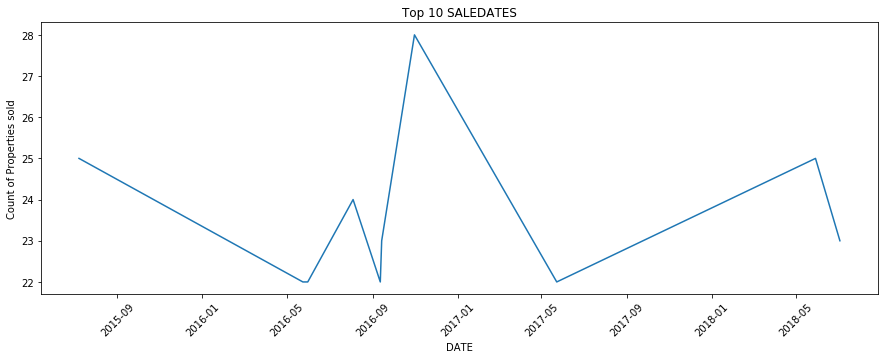

In [61]:
plt.figure(figsize=(15,5))
qualified.groupby("DATE")["QUALIFIED"].count().sort_values(ascending=False).head(10).plot(kind="line")
plt.title("Top 10 SALEDATES")
plt.ylabel("Count of Properties sold")
plt.xticks(rotation=45)

(array([729390., 730120., 730851., 731581., 732312., 733042., 733773.,
        734503., 735234., 735964., 736695.]),
 <a list of 11 Text xticklabel objects>)

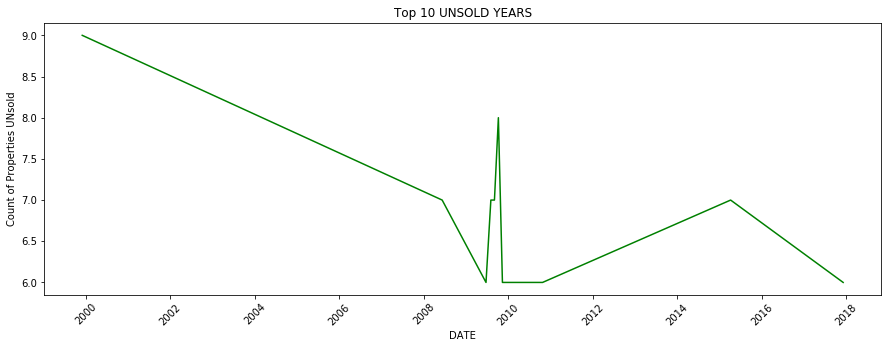

In [62]:
plt.figure(figsize=(15,5))
Uqualified.groupby("DATE")["QUALIFIED"].count().sort_values(ascending=False).head(10).plot(kind="line", color = "g")
plt.title("Top 10 UNSOLD YEARS")
plt.ylabel("Count of Properties UNsold")
plt.xticks(rotation=45)

In [63]:
qualified['month_year'] = pd.to_datetime(qualified['SALEDATE']).dt.to_period('M')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
qualified['month'] = pd.to_datetime(qualified['SALEDATE']).dt.month

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
Uqualified['month_year'] = pd.to_datetime(Uqualified['SALEDATE']).dt.to_period('M')
Uqualified['month'] = pd.to_datetime(Uqualified['SALEDATE']).dt.month

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
qual_m = pd.DataFrame(qualified.groupby("month")["QUALIFIED"].count().sort_values(ascending=False).head(10))

In [67]:
qual_m.reset_index(inplace=True)

In [68]:
qual_m

,month,QUALIFIED
0,6,2624
1,7,2441
2,5,2358
3,8,2178
4,12,2037
5,4,1994
6,10,1979
7,9,1877
8,3,1851
9,11,1837


(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 7 Text xticklabel objects>)

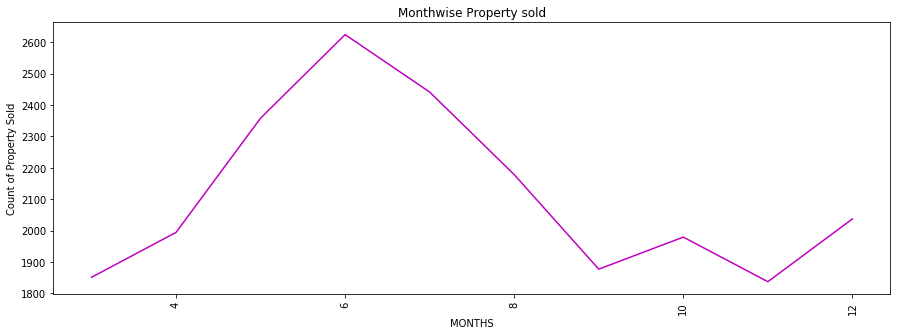

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot(x=qual_m["month"],y=qual_m["QUALIFIED"], data=qual_m, dashes=False,sort=True, color="m")
plt.xlabel("MONTHS")
plt.title("Monthwise Property sold")
plt.ylabel("Count of Property Sold")
plt.xticks(rotation=90)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

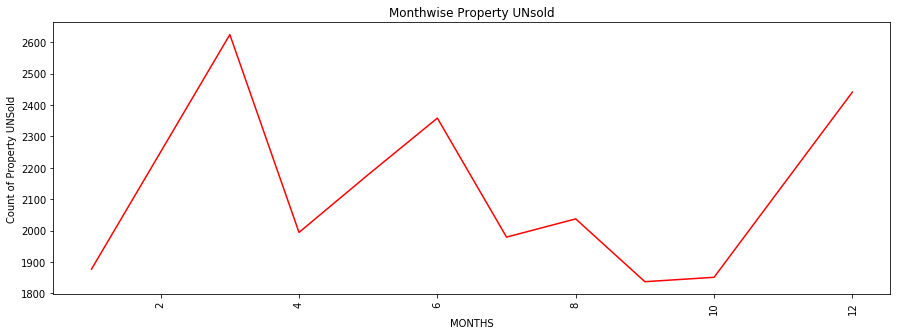

In [70]:
Uqual_m = pd.DataFrame(Uqualified.groupby("month")["QUALIFIED"].count().sort_values(ascending=False).head(10))
Uqual_m.reset_index(inplace=True)
plt.figure(figsize=(15,5))
sns.lineplot(x=Uqual_m["month"],y=qual_m["QUALIFIED"], data=Uqual_m, dashes=False,sort=True, color="r")
plt.xlabel("MONTHS")
plt.title("Monthwise Property UNsold")
plt.ylabel("Count of Property UNSold")
plt.xticks(rotation=90)

In [71]:
data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,18S UJ 23061 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,18S UJ 23074 09289,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,18S UJ 23078 09288,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,18S UJ 23124 09368,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,18S UJ 23142 09324,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [72]:
data.drop(["NATIONALGRID","ASSESSMENT_SUBNBHD","CENSUS_BLOCK"], axis=1, inplace=True)

In [73]:
data.shape

(28900, 36)

In [74]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'ZIPCODE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [75]:
data["HEAT"].mode()

0    Forced Air
dtype: object

In [76]:
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("N/A","ForcedN/AAir"))

In [77]:
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("WarmForcedN/AAirCool","WarmForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("HotForcedN/AAirWaterForcedN/AAirRad","HotForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("HtForcedN/AAirPump","HotForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("ElecForcedN/AAirBaseForcedN/AAirBrd","ElectricForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("ElectricForcedN/AAirRad","ElectricForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("WallForcedN/AAirFurnace","WallForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("ForcedForcedN/AAirAir","Forced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("ForcedN/AAir","Forced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("WaterForcedN/AAirBaseForcedN/AAirBrd","WaterForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("AirForcedN/AAirExchng","Forced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("IndForcedN/AAirUnit","IndForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("EvpForcedN/AAirCool","EvpForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("Air-Oil","AirOil"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("GravityForcedN/AAirFurnac","GravityForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("AirForcedExchng","Forced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("WaterForcedBaseForcedBrd","WaterForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("GravityForcedFurnac","GravityForced"))
data["HEAT"] = data["HEAT"].apply(lambda x: x.replace("EvpForcedCool","EvpForced"))
data["AC"] = data["AC"].apply(lambda x: x.replace("0", "N"))
data['YR_RMDL']=data["YR_RMDL"].replace(to_replace=20,value=2011)
data["STORIES"] = data["STORIES"].replace(to_replace=250, value=2.0)
data["STORIES"] = data["STORIES"].replace(to_replace=275, value=2.0)
data["STORIES"] = data["STORIES"].replace(to_replace=826, value=2.0)
data["WARD"] = data["WARD"].apply(lambda x: x.replace("Ward ",""))
data["CNDTN"] = data["CNDTN"].apply(lambda x: x.replace("Excellent","Very Good"))
data["CNDTN"] = data["CNDTN"].apply(lambda x: x.replace("Fair","Good"))
data["CNDTN"] = data["CNDTN"].apply(lambda x: x.replace("Poor","Average"))
data["CNDTN"] = data["CNDTN"].apply(lambda x: x.replace("Default","Average"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Common Brick","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Face Brick","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Brick/Stucco","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Brick Veneer","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Brick/Stone","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Stucco Block","Stucco"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Stone/Stucco","Stucco"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Wood Siding","Siding"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Brick/Siding","Siding"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Vinyl Siding","Siding"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Metal Siding","Siding"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Default","Brick"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Stone Veneer","Stone"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Concrete Block","Concrete"))
data["EXTWALL"] = data["EXTWALL"].apply(lambda x: x.replace("Stone/Siding","Stone"))

In [78]:
data.drop(["SALEDATE", "USECODE", "GIS_LAST_MOD_DTTM", "ASSESSMENT_NBHD", "GRADE"], axis=1, inplace=True)

In [79]:
data["HEAT"].unique()

array(['Warm Cool', 'Hot Water Rad', 'Forced Air', 'Elec Base Brd',
       'Ht Pump', 'Wall Furnace', 'Electric Rad', 'Water Base Brd',
       'No Data', 'Ind Unit', 'Evp Cool', 'Air Exchng', 'AirOil',
       'Gravity Furnac'], dtype=object)

In [80]:
data = pd.get_dummies(data, drop_first=True)

In [81]:
data.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,WARD_2,WARD_3,WARD_4,WARD_5,WARD_6,WARD_7,WARD_8,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,4,0,2,8,4,1910,1988,1972,3.0,1095000,...,1,0,0,0,0,0,0,1,0,0
1,3,1,2,9,5,1910,2009,1984,3.0,2100000,...,1,0,0,0,0,0,0,1,0,0
2,3,1,2,8,5,1900,2003,1984,3.0,1602000,...,1,0,0,0,0,0,0,1,0,0
3,3,1,2,8,4,1906,2011,1972,3.0,1050000,...,1,0,0,0,0,0,0,1,0,0
4,3,1,2,7,3,1908,2008,1967,2.0,1430000,...,1,0,0,0,0,0,0,1,0,0


In [82]:
mean = np.mean(data["PRICE"])

In [83]:
std = np.std(data["PRICE"])

In [84]:
price = []
for i in data["PRICE"]:
    a = (i- mean)/std
    price.append(a)
    

In [85]:
data["PRICE"] = price

In [86]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS',
       'FIREPLACES', 'LANDAREA', 'ZIPCODE', 'CENSUS_TRACT', 'SQUARE', 'X', 'Y',
       'HEAT_AirOil', 'HEAT_Elec Base Brd', 'HEAT_Electric Rad',
       'HEAT_Evp Cool', 'HEAT_Forced Air', 'HEAT_Gravity Furnac',
       'HEAT_Hot Water Rad', 'HEAT_Ht Pump', 'HEAT_Ind Unit', 'HEAT_No Data',
       'HEAT_Wall Furnace', 'HEAT_Warm Cool', 'HEAT_Water Base Brd', 'AC_Y',
       'QUALIFIED_U', 'STRUCT_Multi', 'STRUCT_Row End', 'STRUCT_Row Inside',
       'STRUCT_Semi-Detached', 'STRUCT_Single', 'STRUCT_Town End',
       'STRUCT_Town Inside', 'CNDTN_Good', 'CNDTN_Very Good', 'EXTWALL_Brick',
       'EXTWALL_Concrete', 'EXTWALL_Hardboard', 'EXTWALL_Plywood',
       'EXTWALL_Shingle', 'EXTWALL_Siding', 'EXTWALL_Stone', 'EXTWALL_Stucco',
       'ROOF_Clay Tile', 'ROOF_Comp Shingle', 'ROOF_Composition Ro',
       'ROOF_Metal- Cpr', 'ROOF_Metal- P

In [87]:
x = data.drop("QUALIFIED_U", axis=1)
y= data.QUALIFIED_U

In [88]:
xtrain, xtest,ytrain, ytest = train_test_split(x,y, random_state=42, test_size=0.20)

In [89]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape )

(23120, 86) (5780, 86) (23120,) (5780,)


In [90]:
log = LogisticRegression()
log.fit(xtrain,ytrain)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
ypred = log.predict(xtest)

In [92]:
confusion_matrix = confusion_matrix(ytest,ypred)

In [93]:
print(confusion_matrix)

[[4797   11]
 [ 965    7]]


In [94]:
accuracy_score(ytest,ypred)

0.8311418685121107

In [95]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4808
           1       0.39      0.01      0.01       972

    accuracy                           0.83      5780
   macro avg       0.61      0.50      0.46      5780
weighted avg       0.76      0.83      0.76      5780



In [96]:
import numpy as np                                                   
from scipy.stats import hmean
                                               
%matplotlib inline
from sklearn.preprocessing import StandardScaler                     # for preprocessing the data

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from catboost import CatBoostClassifier, Pool

from sklearn import metrics, preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')

In [97]:
#pip install ipywidgets

In [98]:
model = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=1000,
    use_best_model=True,custom_loss=["F1"], bootstrap_type='Bayesian',
        eval_metric="F1")


In [99]:
model.fit(xtrain,ytrain,
        eval_set=(xtest,ytest),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [100]:
from sklearn.metrics import f1_score
f1_score(ytest, model.predict(xtest))

0.43454038997214484

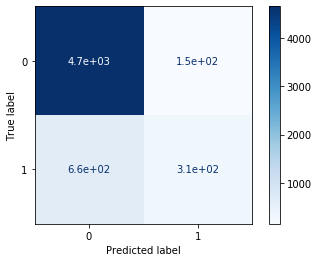

In [101]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix 
Cm=confusion_matrix(ytest,model.predict(xtest))
plot_confusion_matrix(model,xtest, ytest, cmap=plt.cm.Blues )

In [102]:
from sklearn.naive_bayes import BernoulliNB
Bnb = BernoulliNB()

In [103]:
Bnb.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [104]:
pred_B = Bnb.predict(xtest)

In [105]:
accuracy_score(pred_B, ytest)

0.7941176470588235